In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
%matplotlib widget

In [2]:
path1 = 'data_output' # data folder
path2 = 'num_output' # num folder
data_files = sorted(glob.glob(os.path.join(path1, "*.npz")), key=lambda x: int(x.split("_")[-1].split(".")[0]))
num_files = sorted(glob.glob(os.path.join(path2, "*.npz")), key=lambda x: int(x.split("_")[-1].split(".")[0]))
print(len(data_files))
print(len(num_files))

path = 'output'
files = sorted(glob.glob(os.path.join(path, "*npz")))
print(len(files))

0
0
39


In [3]:
# data
#data = np.concatenate([np.load(d)['data'] for d in data_files], axis=0).view('int8')
#data_shape = data.shape
#print('data shape is:', data_shape)
#
## num
#num = np.concatenate([np.load(n)['data'] for n in num_files], axis=0).view('int8')
#num_shape = num.shape
#print('num shape is:', num_shape)

# new files
data0 = np.concatenate([np.load(d0)['data'] for d0 in files], axis=0, dtype='int8')
print(data0.shape)

(4992, 2048, 2)


(4992, 2048, 2)


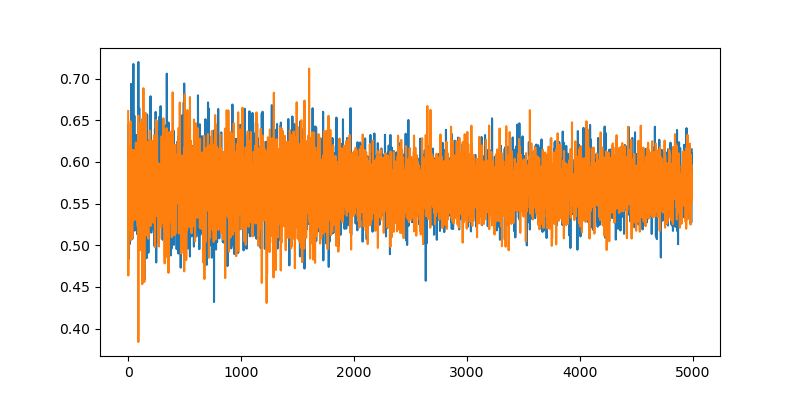

In [22]:
plt.figure(figsize=(8,4))

data_comp = data0[...,0] + 1j * data0[...,1]

plt.plot(np.angle(data_comp[:-1,-1] * data_comp[1:,0].conj()))
plt.plot(np.angle(data_comp[:,-2] * data_comp[:,-1].conj()))
print(data0.shape)
#plt.xlim(1500,2050)
plt.show()


# for checking specific number of files
#for i in range(1):
#    data = np.load(data_files[i])['data'].view('int8')
#    print(data.shape)
#    plt.plot(data[:,0])
#plt.close('all')

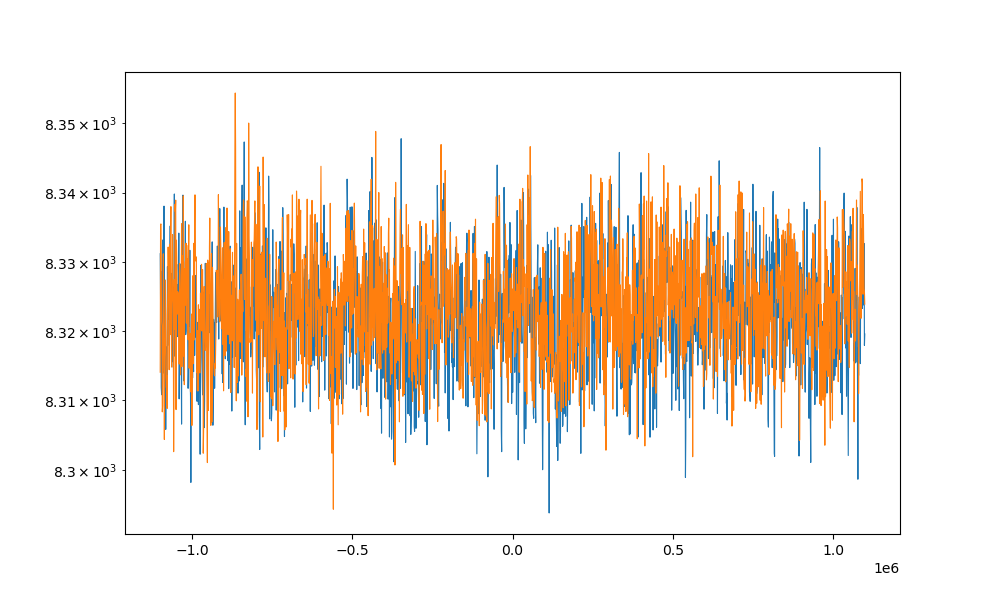

In [17]:
from scipy.fft import fft, fftshift

num_samples = 2048
sampling_rate = 2.2e6

freqs = np.fft.fftshift(np.fft.fftfreq(num_samples, 1/sampling_rate))

# Power spectra (absolute value squared)
def perform_power(signal):
    return np.abs(signal)**2

# Shifts it!
def shift(signal):
    return fftshift(signal)

pwr_shift = shift(np.mean(perform_power(fft(data0)), axis=0))

plt.figure(figsize=(10, 6))
plt.semilogy(freqs, pwr_shift, linewidth=0.8, label='data')


In [16]:
plt.close('all')